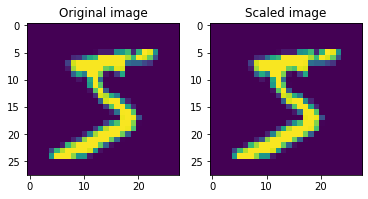

In [9]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from sklearn.preprocessing import OneHotEncoder

(X_train, y_train), (X_test, y_test) = load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0


onehot = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train_encode = onehot.fit_transform(y_train).toarray()
y_test_encode = onehot.transform(y_test).toarray()

fig, ax = plt.subplots(1,2)
ax[0].imshow(X_train[0])
ax[0].set_title('Original image')
ax[1].imshow(X_train_scaled[0])
ax[1].set_title('Scaled image')
plt.show()

In [10]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Model
from keras import Input

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

input_layer = Input(shape=(28,28,1))
con1 = Conv2D(10, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPool2D(2)(con1)
con2 = Conv2D(5, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool2D(2)(con2)
flat = Flatten()(pool2)
dense1 = Dense(10, activation='relu')(flat)
output_layer = Dense(10, activation='softmax')(dense1)

model = Model(input_layer, output_layer)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 5)         455       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 125)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1260

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
fitted_model = model.fit(X_train_scaled, y_train_encode, epochs = 10, batch_size = 128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.9222 - accuracy: 0.6848 - val_loss: 0.3041 - val_accuracy: 0.9088
Epoch 2/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.2651 - accuracy: 0.9216 - val_loss: 0.1997 - val_accuracy: 0.9394
Epoch 3/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.1966 - accuracy: 0.9415 - val_loss: 0.1657 - val_accuracy: 0.9502
Epoch 4/10
48000/48000 [==============================] - 2s 45us/step - loss: 0.1642 - accuracy: 0.9504 - val_loss: 0.1440 - val_accuracy: 0.9550
Epoch 5/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.1460 - accuracy: 0.9556 - val_loss: 0.1315 - val_accuracy: 0.9594
Epoch 6/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.1344 - accuracy: 0.9593 - val_loss: 0.1284 - val_accuracy: 0.9603
Epoch 7/10
48000/48000 [==============================] - 2s 50us/st

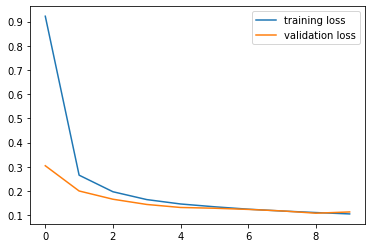

In [14]:
plt.plot(fitted_model.history['loss'], label='training loss')
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

10000/10000 [==============================] - 1s 81us/step
loss function : 0.10805112137068063,  accuracy : 4%


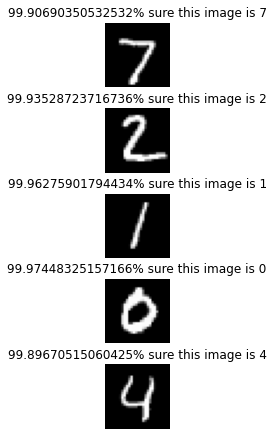

In [13]:
score = model.evaluate(X_test_scaled, y_test_encode)
print('loss function : {},  accuracy : {}%'.format(score[0],4,score[1]*100))
pred = model.predict(X_test_scaled)

n = 5
fig, ax = plt.subplots(n,1, figsize=(5, 6))
for i in range(n):
  ax[i].imshow(X_test[i], cmap='gray')
  ax[i].axis('off')
  ax[i].set_title('{}% sure this image is {}'.format(np.max(pred[i])*100, np.argmax(pred[i])))

fig.tight_layout(pad=0.5)
plt.show()
